In [41]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/3.0, random_state=1)

In [43]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
# Special Note: There seems to be a mistake in the book and github code
# y_train has to be transformed to torch.long for the loss function
# to work accurately.
y_train = y_train.to(dtype=torch.long)
train_ds = TensorDataset(X_train_norm, y_train)

In [44]:
torch.manual_seed(1)
BATCH_SIZE = 2
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

In [45]:
# Constants
LEARNING_RATE = 0.001
NUMBER_OF_EPOCHS = 100
INPUT_SIZE = X_train_norm.shape[1]
HIDDEN_SIZE = 16
OUTPUT_SIZE = 3

In [46]:
class Model(nn.Module):
    
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [47]:
model = Model(input_size = INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [48]:
loss_hist = [0] * NUMBER_OF_EPOCHS
accuracy_hist = [0] * NUMBER_OF_EPOCHS

for epoch in range(NUMBER_OF_EPOCHS):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        print(pred)
        loss = loss_function(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

tensor([[0.2641, 0.4781, 0.2577],
        [0.2683, 0.4628, 0.2690]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2648, 0.4671, 0.2681],
        [0.2695, 0.4481, 0.2824]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2690, 0.4459, 0.2851],
        [0.2622, 0.4691, 0.2686]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2696, 0.4347, 0.2957],
        [0.2693, 0.4318, 0.2989]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2652, 0.4434, 0.2914],
        [0.2689, 0.4305, 0.3006]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2676, 0.4341, 0.2983],
        [0.2646, 0.4511, 0.2844]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2614, 0.4620, 0.2766],
        [0.2681, 0.4366, 0.2953]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2648, 0.4548, 0.2804],
        [0.2698, 0.4330, 0.2972]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2658, 0.4494, 0.2848],
        [0.2712, 0.4264, 0.3024]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2658, 0.4550, 0.2793],
        [0.2631, 0.4634, 0.2736]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2711, 0.4295, 0.299

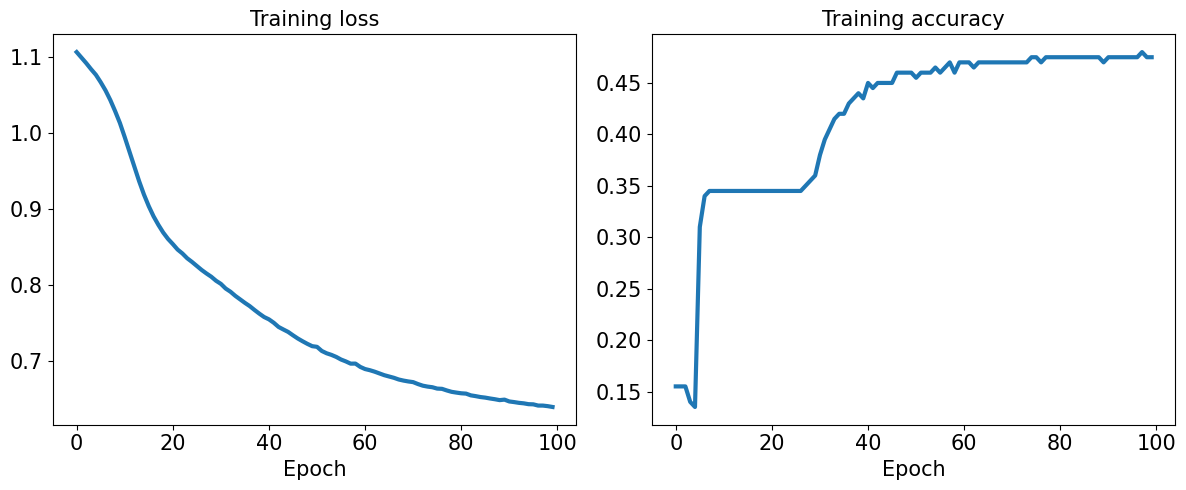

In [61]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('./Results/8_IRIS_Torch.png')
plt.show()

In [50]:
# Evaluating Model Performance
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
softmax_multiclass_probabilities = model(X_test_norm)

In [51]:
predictions = torch.argmax(softmax_multiclass_probabilities, dim=1)
predictions

tensor([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0,
        2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0,
        0, 1])

In [55]:
# predictions == y_test produces a list of booleans
correct_predictions = (predictions == y_test).float()
correct_predictions

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
accuracy = correct_predictions.mean()
print(f'Model Accuracy on Test Set: {accuracy*100:.2f}%')

Model Accuracy on Test Set: 98.00%


In [58]:
# Saving the trained model
import os

if 'models' not in os.listdir():
    os.mkdir('models')

path = './models/iris_classifier.pt'

torch.save(model, path)

In [59]:
# Reloading the saved model
path = './models/iris_classifier.pt'
model_new = torch.load(path)

In [60]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [62]:
# Evaluating the loaded model on test set
softmax_multiclass_probabilities = model_new(X_test_norm)
correct = (torch.argmax(softmax_multiclass_probabilities, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Model Accuracy on Test Set: {accuracy*100:.2f}%')

Model Accuracy on Test Set: 98.00%


In [63]:
if 'model_state' not in os.listdir():
    os.mkdir('model_state')

path = './model_state/iris_classifier_state.pt'
torch.save(model.state_dict(), path)